In [2]:
pip install --pre pycaret


     -------------------------------------- 487.2/487.2 kB 1.4 MB/s eta 0:00:00
  Using cached scipy-1.8.1-cp39-cp39-win_amd64.whl (36.9 MB)
  Using cached ipywidgets-8.0.2-py3-none-any.whl (134 kB)
     ---------------------------------------- 65.9/65.9 MB 2.0 MB/s eta 0:00:00
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
     ---------------------------------------- 69.1/69.1 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 1.5 MB/s eta 0:00:00
     ------------------------------------ 199.3/199.3 kB 366.5 kB/s eta 0:00:00
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
     ------------------------------------ 601.9/601.9 kB 664.0 kB/s eta 0:00:00
     -------------------------------------- 137.2/137.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ----------------------

In [8]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [5]:
train = pd.read_csv(r'D:\ML-and-DP-practice\Machine and Deep Learning\Practice\House prices regression pycaret\house-prices-advanced-regression\train.csv')
test = pd.read_csv(r'D:\ML-and-DP-practice\Machine and Deep Learning\Practice\House prices regression pycaret\house-prices-advanced-regression\test.csv')

In [7]:
print(train.shape)
print(test.shape)
print(train.head())
print(test.head())

(1460, 81)
(1459, 80)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
column = list(train.columns)
len(column)

81

In [33]:
l = list(train[column[0]])
print(l.count(1))

1


In [39]:
columns = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']
len(columns)

37

In [38]:
col=[]
for c in column:
    if((list(train[c]).count(0)) > 0):
        col.append(c)
        
len(col)

23

In [47]:
data = setup(data = train, target = 'SalePrice', categorical_features = columns,
                   ignore_features= ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
                   normalize = True)

,Description,Value
0,Session id,2156
1,Target,SalePrice
2,Target type,Regression
3,Data shape,"(1460, 144)"
4,Train data shape,"(1021, 144)"
5,Test data shape,"(439, 144)"
6,Ignore features,6
7,Ordinal features,2
8,Numeric features,37
9,Categorical features,37


In [48]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,17527.3141,1201195553.5915,31251.5679,0.8373,0.1390,0.0996,0.5260
huber,Huber Regressor,17325.5744,1215485411.3867,30989.6899,0.8365,0.1400,0.0999,0.4640
en,Elastic Net,18620.3541,1256742523.3987,32942.6172,0.8274,0.1400,0.1035,0.3780
br,Bayesian Ridge,19502.8270,1316911764.0278,33640.9476,0.8172,0.1544,0.1117,0.3790
llar,Lasso Least Angle Regression,19717.1140,1326409565.0774,33832.6805,0.8139,0.1679,0.1138,0.4330
omp,Orthogonal Matching Pursuit,20589.0964,1311474721.6837,34005.4301,0.8138,0.1675,0.1208,0.3500
ridge,Ridge Regression,20547.0680,1384566839.8537,34683.4592,0.8051,0.1805,0.1197,0.3280
lasso,Lasso Regression,20585.1704,1384351237.9016,34688.6051,0.8050,0.1821,0.1203,0.8310
knn,K Neighbors Regressor,26765.2430,1960756030.9548,42908.4271,0.7109,0.2087,0.1513,0.3980
et,Extra Trees Regressor,50578.8917,5130287089.6403,70600.0832,0.2209,0.3532,0.3079,0.9440


In [54]:
model = create_model('par')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14471.1560,423531067.2358,20579.8704,0.9245,0.1227,0.0859
1,17216.1440,555328061.0109,23565.3997,0.8696,0.1377,0.1059
2,22617.8387,2399372346.2334,48983.3885,0.6847,0.1682,0.1134
3,16901.9388,525306160.5453,22919.5585,0.9275,0.1356,0.1063
4,15181.4579,459580649.5692,21437.8322,0.9121,0.1158,0.0873
5,14707.9001,528710371.7999,22993.7029,0.9066,0.1283,0.0813
6,16561.6671,966885849.2435,31094.7881,0.8783,0.1205,0.0855
7,18500.6351,1335553255.2634,36545.2221,0.8580,0.1313,0.0954
8,13412.7268,293591608.0410,17134.5151,0.9118,0.1088,0.0842


In [57]:
tuneModel = tune_model('par')

TypeError: 'PassiveAggressiveRegressor' object is not callable

In [59]:
print(model)

PassiveAggressiveRegressor(random_state=2156)


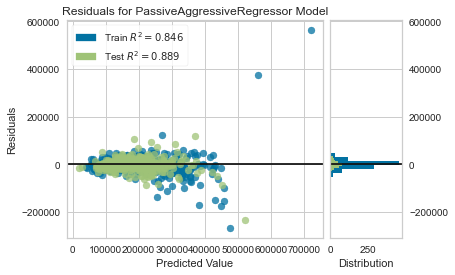

In [60]:
plot_model(model)

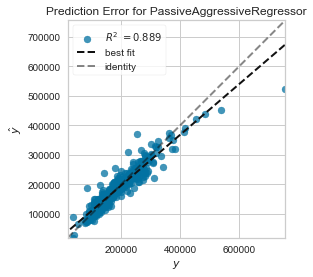

In [61]:
plot_model(model, plot='error')

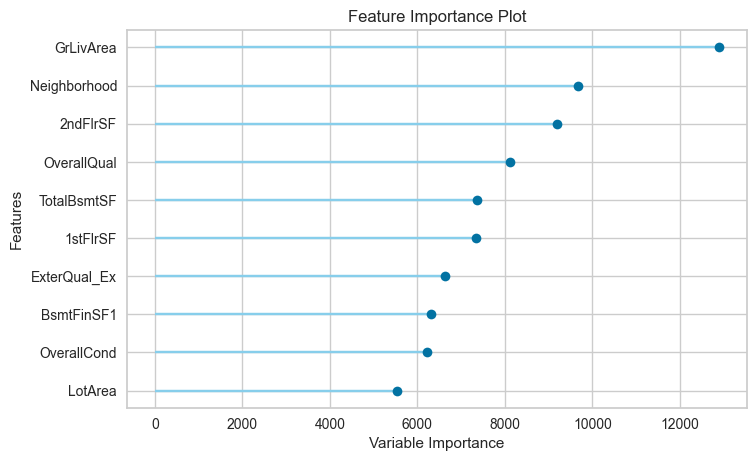

In [62]:
plot_model(model,plot = 'feature')

In [64]:
plot_model?

Signature:
plot_model(
    estimator,
    plot: str = 'residuals',
    scale: float = 1,
    save: bool = False,
    fold: Union[int, Any, NoneType] = None,
    fit_kwargs: Optional[dict] = None,
    plot_kwargs: Optional[dict] = None,
    groups: Union[str, Any, NoneType] = None,
    use_train_data: bool = False,
    verbose: bool = True,
    display_format: Optional[str] = None,
) -> Optional[str]
Docstring:
This function analyzes the performance of a trained model on holdout set.
It may require re-training the model in certain cases.


Example
--------
>>> from pycaret.datasets import get_data
>>> boston = get_data('boston')
>>> from pycaret.regression import *
>>> exp_name = setup(data = boston,  target = 'medv')
>>> lr = create_model('lr')
>>> plot_model(lr, plot = 'residual')


estimator: scikit-learn compatible object
    Trained model object


plot: str, default = 'residual'
    List of available plots (ID - Name):

    * 'pipeline' - Schematic drawing of the preprocessing pipe

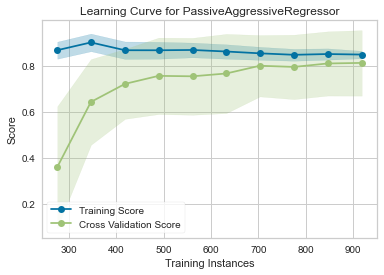

In [65]:
plot_model(model, plot='learning')

In [67]:
# evaluate_model(model)
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,15761.8320,624849047.9410,24996.9808,0.8887,0.1334,0.0933


,Id,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_RH,MSZoning_FV,MSZoning_C (all),LotFrontage,LotArea,Street,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prediction_label
1021,-1.660841,-0.887713,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,0.000000,0.079476,0.076885,...,-0.118332,-0.258774,-0.076511,1.116032,-1.234488,1.654719,-0.236212,-0.223729,149000,164228.831291
1022,-0.985173,-0.887713,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,2.049354,0.331251,0.076885,...,-0.118332,-0.258774,-0.076511,-0.088415,-1.974384,-1.324943,-0.236212,-0.223729,205000,208104.310161
1023,-0.248081,2.859974,-1.859708,2.328386,-0.113564,-0.222108,-0.094304,-2.137224,-0.917195,0.076885,...,-0.118332,-0.258774,-0.076511,-0.088415,-0.494592,1.654719,-0.236212,-0.223729,75500,69441.613047
1024,0.978044,0.049209,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,0.409251,-0.064965,0.076885,...,-0.118332,-0.258774,-0.076511,-0.088415,-0.124645,0.909804,-0.236212,-0.223729,239500,223731.235575
1025,0.359075,0.049209,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,-0.022355,-0.175161,0.076885,...,-0.118332,-0.258774,-0.076511,-0.088415,-0.124645,1.654719,-0.236212,-0.223729,200500,184046.785763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.103255,3.094205,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,1.574587,0.015485,0.076885,...,-0.118332,-0.258774,-0.076511,-0.088415,0.615251,0.909804,-0.236212,-0.981419,95000,94906.468569
1456,1.325328,-0.887713,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,-0.151836,-0.067009,0.076885,...,-0.118332,-0.258774,-0.076511,-0.088415,-1.234488,0.909804,-0.236212,-0.223729,227000,201397.494497
1457,0.283476,-0.185021,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,-0.022355,0.133245,0.076885,...,-0.118332,-0.258774,-0.076511,-0.088415,-0.494592,0.164888,-0.236212,-0.223729,130500,121021.081824
1458,0.798496,0.049209,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,0.000000,1.992881,0.076885,...,-0.118332,-0.258774,-0.076511,-0.088415,-1.974384,0.909804,-0.236212,-0.223729,248000,254591.788803


In [70]:
finalModel = finalize_model(model)
print(finalModel)

Pipeline(memory=Memory(location=C:\Users\HP\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                             'LotArea', 'OverallQual',
                                             'OverallCond', 'YearBuilt',
                                             'YearRemodAdd', 'MasVnrArea',
                                             'BsmtFinSF1', 'BsmtFinSF2',
                                             'BsmtUnfSF', 'TotalBsmtSF',
                                             '1stFlrSF', '2ndFlrSF',
                                             'LowQualFinSF', 'GrLivArea',
                                             'BsmtFullBat...
                                                                         'Foundation',
                                                                         'BsmtFinType1',
                                                                 

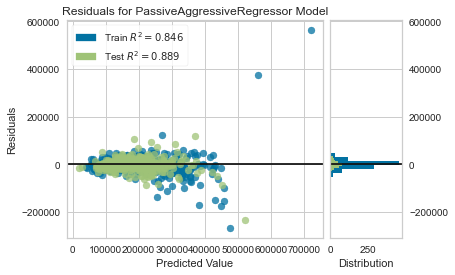

In [71]:
plot_model(best)

In [74]:
pred = predict_model(model, data = test)

In [82]:
pred.head()

,Id,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_RH,MSZoning_FV,MSZoning_C (all),LotFrontage,LotArea,Street,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,prediction_label
0,1.750573,-0.887713,-1.859708,-0.429482,8.805593,-0.222108,-0.094304,0.409251,0.118423,0.076885,...,-0.362641,-0.118332,1.962707,-0.076511,-0.088415,-0.124645,1.654719,-0.236212,-0.223729,118192.372797
1,1.752935,-0.887713,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,0.452412,0.388802,0.076885,...,-0.362641,-0.118332,-0.258774,-0.076511,21.419564,-0.124645,1.654719,-0.236212,-0.223729,157943.381449
2,1.755298,0.049209,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,0.150288,0.344131,0.076885,...,-0.362641,-0.118332,-0.258774,-0.076511,-0.088415,-1.234488,1.654719,-0.236212,-0.223729,185760.094295
3,1.757660,0.049209,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,0.322930,-0.049631,0.076885,...,-0.362641,-0.118332,-0.258774,-0.076511,-0.088415,-0.124645,1.654719,-0.236212,-0.223729,197707.802668
4,1.760023,1.454592,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,-1.187691,-0.557985,0.076885,...,-0.362641,-0.118332,2.407003,-0.076511,-0.088415,-1.974384,1.654719,-0.236212,-0.223729,182789.254238


In [85]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

None


In [79]:
predictions = predict_model(best,data= test)

In [83]:
predictions.head()

,Id,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_RH,MSZoning_FV,MSZoning_C (all),LotFrontage,LotArea,Street,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,prediction_label
0,1.750573,-0.887713,-1.859708,-0.429482,8.805593,-0.222108,-0.094304,0.409251,0.118423,0.076885,...,-0.362641,-0.118332,1.962707,-0.076511,-0.088415,-0.124645,1.654719,-0.236212,-0.223729,118192.372797
1,1.752935,-0.887713,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,0.452412,0.388802,0.076885,...,-0.362641,-0.118332,-0.258774,-0.076511,21.419564,-0.124645,1.654719,-0.236212,-0.223729,157943.381449
2,1.755298,0.049209,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,0.150288,0.344131,0.076885,...,-0.362641,-0.118332,-0.258774,-0.076511,-0.088415,-1.234488,1.654719,-0.236212,-0.223729,185760.094295
3,1.757660,0.049209,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,0.322930,-0.049631,0.076885,...,-0.362641,-0.118332,-0.258774,-0.076511,-0.088415,-0.124645,1.654719,-0.236212,-0.223729,197707.802668
4,1.760023,1.454592,0.537719,-0.429482,-0.113564,-0.222108,-0.094304,-1.187691,-0.557985,0.076885,...,-0.362641,-0.118332,2.407003,-0.076511,-0.088415,-1.974384,1.654719,-0.236212,-0.223729,182789.254238


In [84]:
save_model(best,"house-prices-prediction")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\HP\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'GrLivArea',
                                              'BsmtFullBat...
                                                                          'Foundation',
                                                                          'BsmtFinType1',
                                                    